# Weighted Average & Agg

### How to define custom functions in Pandas (with three ways of defining and calling a weighted average function) and some notes on the *.agg()* function

In [54]:
#over the last 12 monhts, per region I want to know the 'average price' weighted by 'total volume'

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [55]:

df =pd.read_csv('avocado.csv', index_col='Date')

df.index = pd.to_datetime(df.index)


In [56]:
df.last('12M')

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2017-12-31,0,1.47,113514.42,2622.70,101135.53,20.25,9735.94,5556.98,4178.96,0.0,conventional,2017,Albany
2017-12-24,1,1.45,77039.09,2811.71,58592.23,19.06,15616.09,6863.18,8752.91,0.0,conventional,2017,Albany
2017-12-17,2,1.43,70677.56,2578.95,50811.52,79.18,17207.91,8914.13,8293.78,0.0,conventional,2017,Albany
2017-12-10,3,1.29,92325.53,3220.05,75147.56,104.36,13853.56,7268.21,6585.35,0.0,conventional,2017,Albany
2017-12-03,4,1.39,139970.00,3772.00,126551.00,136.00,9511.00,7061.00,2450.00,0.0,conventional,2017,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-04,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
2018-01-28,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
2018-01-21,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico


In [89]:
df.groupby('region')['AveragePrice'].mean().head()

region
Albany                 1.561036
Atlanta                1.337959
BaltimoreWashington    1.534231
Boise                  1.348136
Boston                 1.530888
Name: AveragePrice, dtype: float64

In [59]:
#dataset with only last 12 months

wa = df.last('12M')

In [60]:
# cosutm function to calculate the weighted mean

def wavg(group, avg_name, weight_name):
    
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()




## The next custom functioin requires you to specify the columns in the *definition*. It is less practical, but gives you more flexibility as it only requires one argument to be passed

In [ ]:
#thos second function does not account for missing values, which need to be checked beforehand
def weighted_math_average(df):
    weighted_math = df['UGDS'] * df['SATMTMID']
    return int(weighted_math.sum() / df['UGDS'].sum())

In [61]:

wa['wavg'] = wavg(wa, 'AveragePrice', 'Total Volume')

In [ ]:
### If we simply apply the first function, we get the same weighted average across the entire dataframe. We want to try having the average by region

In [62]:
wa.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,wavg
Date,,,,,,,,,,,,,,
2017-12-31,0,1.47,113514.42,2622.70,101135.53,20.25,9735.94,5556.98,4178.96,0.0,conventional,2017,Albany,1.189811
2017-12-24,1,1.45,77039.09,2811.71,58592.23,19.06,15616.09,6863.18,8752.91,0.0,conventional,2017,Albany,1.189811
2017-12-17,2,1.43,70677.56,2578.95,50811.52,79.18,17207.91,8914.13,8293.78,0.0,conventional,2017,Albany,1.189811
2017-12-10,3,1.29,92325.53,3220.05,75147.56,104.36,13853.56,7268.21,6585.35,0.0,conventional,2017,Albany,1.189811
2017-12-03,4,1.39,139970.00,3772.00,126551.00,136.00,9511.00,7061.00,2450.00,0.0,conventional,2017,Albany,1.189811


### Note how the APPLY function does not require us to pass the dataframe, as it is implied

In [90]:
wa.groupby("region").apply(wavg, "AveragePrice", "Total Volume").sort_values(ascending=False).head()

region
HartfordSpringfield    1.563570
NewYork                1.541371
Chicago                1.524747
Philadelphia           1.504110
Albany                 1.482733
dtype: float64

### We can also plot the query as a bar chart

Text(0.5, 1.0, 'Avocado sales over the last 12 months per region (in tens of millions)')

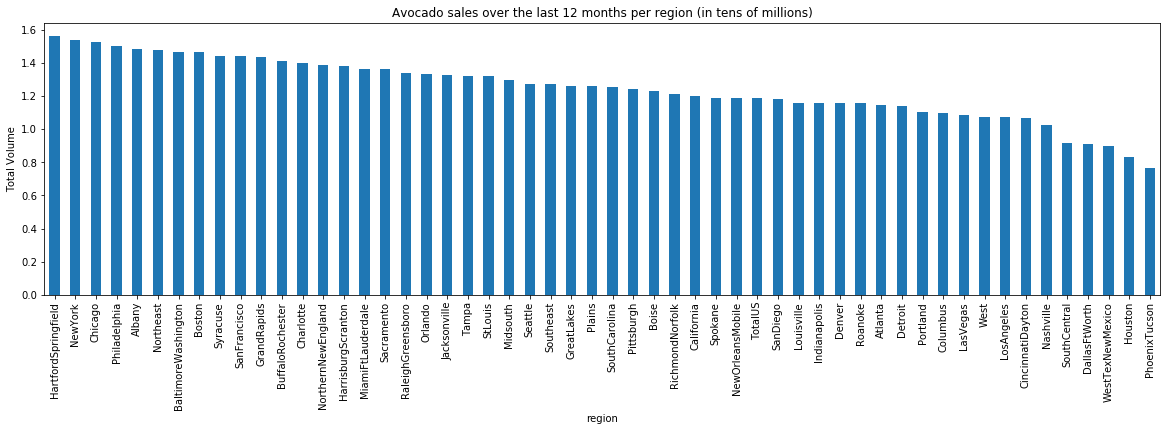

In [12]:

ba = wa.groupby("region").apply(wavg, "AveragePrice", "Total Volume").sort_values(ascending=False)
ba.plot.bar( figsize=(20, 5))
plt.ylabel('Total Volume')
plt.title('Avocado sales over the last 12 months per region (in tens of millions)')

In [ ]:
def weighted_average(df, data_col, weight_col, by_col):
    df['_data_times_weight'] = df[data_col] * df[weight_col]
    df['_weight_where_notnull'] = df[weight_col] * pd.notnull(df[data_col])
    g = df.groupby(by_col)
    result = g['_data_times_weight'].sum() / g['_weight_where_notnull'].sum()
    del df['_data_times_weight'], df['_weight_where_notnull']
    return result

### The *agg* fucntion allows us to aggregate operations, like calling average and sum with one line

In [66]:
#show mean and sum together with agg
df.groupby(['region','type'])['Total Volume'].agg(['mean','sum'])

mean           sum
region              type                                    
Albany              conventional  9.290303e+04  1.570061e+07
                    organic       2.172713e+03  3.671885e+05
Atlanta             conventional  5.127893e+05  8.666139e+07
                    organic       1.150135e+04  1.943727e+06
BaltimoreWashington conventional  7.736425e+05  1.307456e+08
...                                        ...           ...
TotalUS             organic       9.675657e+05  1.635186e+08
West                conventional  6.209234e+06  1.049361e+09
                    organic       2.214116e+05  3.741857e+07
WestTexNewMexico    conventional  8.401582e+05  1.419867e+08
                    organic       1.527171e+04  2.535104e+06

[108 rows x 2 columns]

### *agg* allows us to define a list of operations and columns where to execute them as a dictionary:

(more on the agg function [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html))

In [91]:
f = {'Total Volume': ['mean'],'AveragePrice': ['median'], 'Total Bags': ['sum', 'mean']}
wa.groupby("region").agg(f).head()

Total Volume AveragePrice   Total Bags              
                              mean       median          sum          mean
region                                                                    
Albany                29629.836453        1.720   1258797.30   5379.475641
Atlanta              162189.291923        1.490  15909286.33  67988.403120
BaltimoreWashington  234306.778462        1.635  16066161.04  68658.807863
Boise                 26537.544103        1.445   2697593.81  11528.178675
Boston               171265.296239        1.685   9537889.97  40760.213547

In [92]:
wa.groupby("region").agg(min_total_volume=('Total Volume','min'),max_average_price=('AveragePrice','max')).head()

,min_total_volume,max_average_price
region,,
Albany,774.20,2.13
Atlanta,3047.38,2.75
BaltimoreWashington,6884.09,2.28
Boise,562.64,2.79
Boston,1948.28,2.19


### Another example of a custom fonction for weighted average

In [80]:
def weighted_average(data):
    d = {}
    d['d1_wa'] = np.average(data['AveragePrice'], weights=data['Total Volume'])
    d['d2_wa'] = np.average(data['AveragePrice'], weights=data['Total Bags'])
    return pd.Series(d)

In [88]:
wa.groupby('region').apply(weighted_average).head()

,d1_wa,d2_wa
region,,
Albany,1.482733,1.526229
Atlanta,1.147907,1.143423
BaltimoreWashington,1.467214,1.481799
Boise,1.228589,1.206409
Boston,1.464356,1.537672


# Aggregating custom fucntions

### A work-around is having the result of each custom function as a new column

In [85]:
data_1 = wa.groupby("region").apply(wavg, "AveragePrice", "Total Volume")
data_2 = wa.groupby("region").apply(wavg, "AveragePrice", "Total Bags")

In [87]:
summary = pd.DataFrame(data=dict(s1=data_1, s2=data_2))
summary.columns = ["w/ Volume","w/ n. bags"]
summary.head()

,w/ Volume,w/ n. bags
region,,
Albany,1.482733,1.526229
Atlanta,1.147907,1.143423
BaltimoreWashington,1.467214,1.481799
Boise,1.228589,1.206409
Boston,1.464356,1.537672
